In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [2]:
df =pd.read_excel('canada.xlsx', sheet_name='Canada by Citizenship',
skiprows=20, skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Preprocessing of data according to need

In [3]:
print (df.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


column remaining according to need

In [4]:
df.rename({
    'OdName':'country',
    'AreaName':'continent',
    'RegName':'region',
    'DevName':'country_status'
}, axis=1, inplace=True)

check the count of values in a categorical column and drop if the count is 1

In [5]:
df.describe(include='object')

,Type,Coverage,country,continent,region,country_status
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [6]:
df['Type'].value_counts()   # count the number of each unique value in the column

Immigrants    195
Name: Type, dtype: int64

drop the column which are not required

In [7]:
cols_to_drop = ['Type','Coverage','AREA','REG','DEV']
df.drop(columns=cols_to_drop, inplace=True)  # columns with no useful data are dropped

setting the index to country names

In [8]:
df.set_index('country',inplace=True)   # set the country as the index

adding a total column which is the sum of all the years for a particular country

In [9]:
years = list(range(1980, 2014))
df['total'] = df[years].sum(axis=1)
df.head(3)

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


making the country status to binary

In [10]:
def binarize(val):
    if val == 'Developing regions':
        return 0
    else:
        return 1
df['country_status'] = df['country_status'].apply(binarize)

In [11]:
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,0,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,0,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,1,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
df.sort_values(by='total',ascending=False,inplace=True)
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,0,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,0,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,0,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,0,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [13]:
print(df.index.to_list())

['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan', 'United States of America', 'Iran (Islamic Republic of)', 'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France', 'Jamaica', 'Viet Nam', 'Romania', 'Haiti', 'Guyana', 'Portugal', 'Egypt', 'Morocco', 'Colombia', 'Iraq', 'Algeria', 'Israel', 'Bangladesh', 'Germany', 'Russian Federation', 'Mexico', 'Afghanistan', 'El Salvador', 'Ukraine', 'Trinidad and Tobago', 'Somalia', 'South Africa', 'Nigeria', 'Jordan', 'Ethiopia', 'Peru', 'Turkey', 'Syrian Arab Republic', 'Brazil', 'Japan', 'Netherlands', 'Ghana', 'Democratic Republic of the Congo', 'Malaysia', 'Australia', 'Bulgaria', 'Italy', 'Bosnia and Herzegovina', 'Chile', 'Venezuela (Bolivarian Republic of)', 'Fiji', 'Cuba', 'Argentina', 'Guatemala', 'Sudan', 'Tunisia', 'Kenya', 'Ireland', 'Hungary', 'Cameroon', 'Albania', 'Mauritius', 'Switzerland', 'Republic of Moldova', 'Singapore', 'Indonesia', 'United Republic of Tanzania', 'Gre

In [14]:
df.rename({
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Iran (Islamic Republic of)':'Iran',
    'United States of America':'USA',
    'Hong Kong, China (SAR)':'Hong Kong',
    'Viet Nam':'Vietnam',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Bolivia (Plurinational State of)':'Bolivia',
    "Lao People's Democratic Republic":'Lao',
    'China, Macao Special Administrative Region':'Macao',
    'Democratic Republic of the Congo':'Congo',
},inplace=True)

just for this situation, we have a 40 something columns, and as we can see them, we will change pandas display options to show all the columns

In [15]:
pd.set_option('display.max_rows',None)

In [16]:
df.head(3)

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,0,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,0,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500


# change plotting theme

In [17]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-paper')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


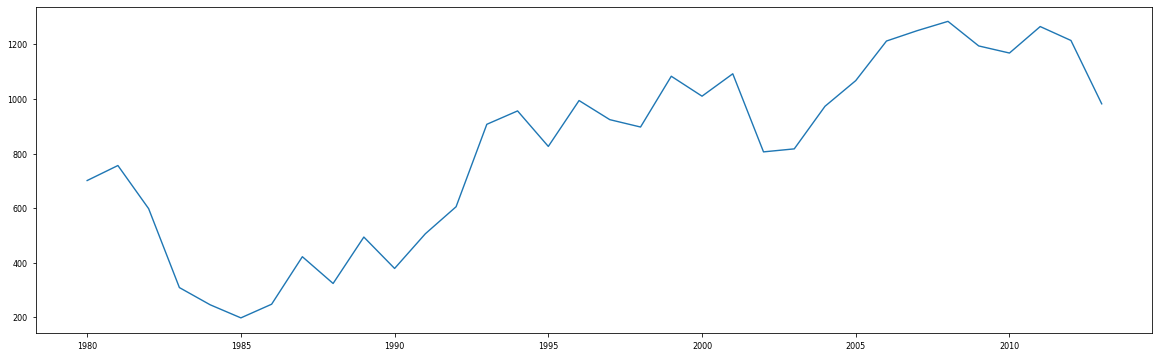

In [18]:
df.loc['Japan',years].plot(kind='line', figsize=(20,6))
plt.show()

# add pandas styling

In [19]:
continent_df = df.groupby('continent')[years].sum()

In [20]:
continent_df.style.background_gradient(cmap='Pastel1_r')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [21]:
continent_df.style.bar(color='darkblue')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [22]:
continent_df.style.text_gradient(cmap='rainbow')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


# visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

#### basic graphs - Matplotlib

1. Line Plot
2. Bar Plot
3. Pie Chart
4. Box Plot
5. Scatter Plot
6. Histogram
7. Area Plot

#### advanced graph - Seaborn

1. CatPlot
2. JoinPlot



<AxesSubplot: >

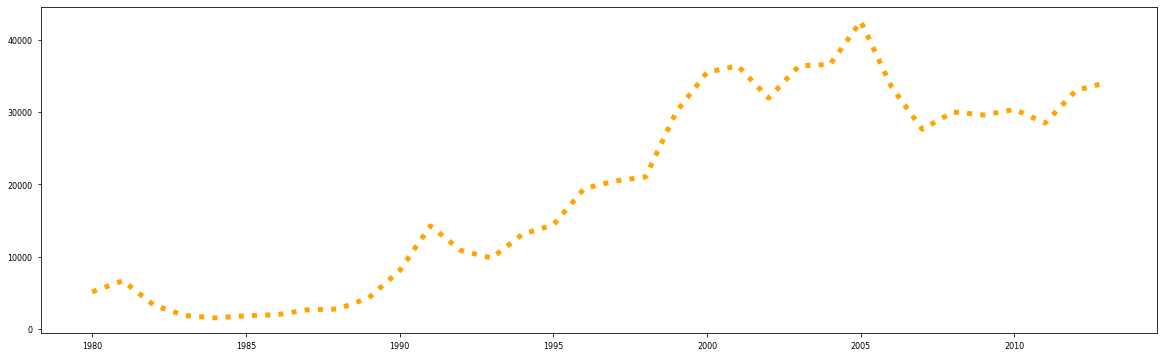

In [41]:
df.loc['China',years].plot(kind='line', figsize=(20,6), linewidth=5, linestyle=':',color='orange')

In [29]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000011D2229EC40>
File:           c:\users\lenovo\downloads\new folder\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' 

<AxesSubplot: >

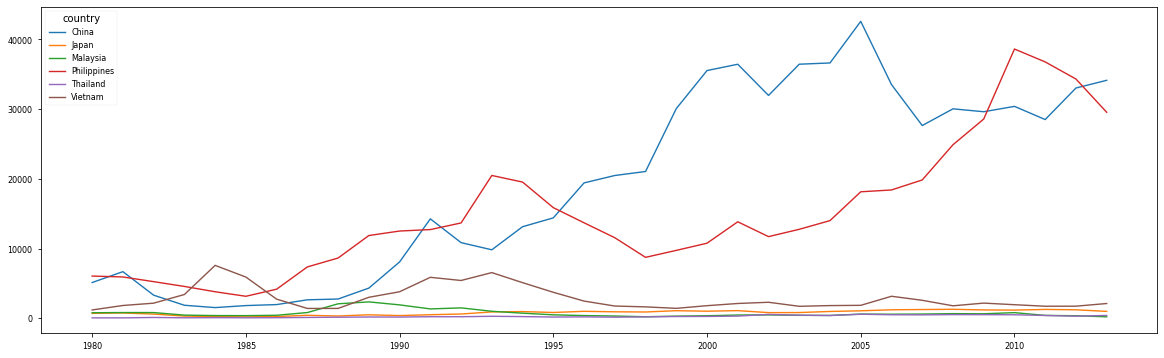

In [34]:
country_list = ['China','Japan','Malaysia','Philippines','Thailand','Vietnam']
df.loc[country_list,years].T.plot(figsize=(20,6))

<AxesSubplot: >

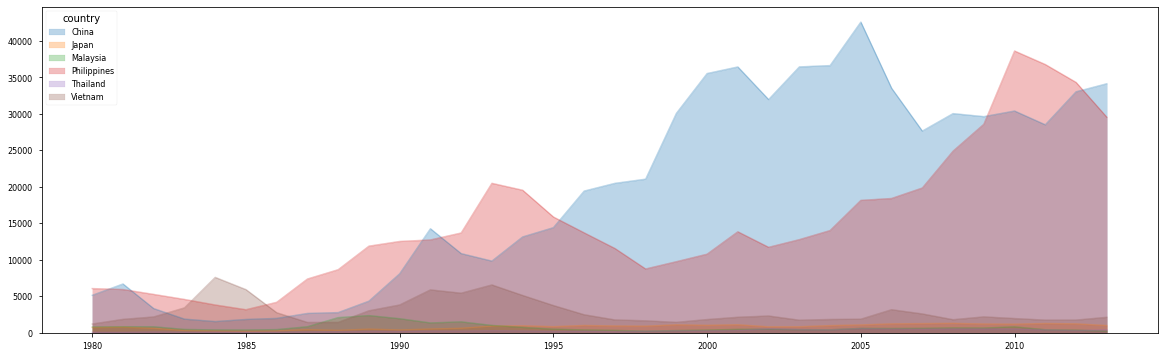

In [36]:
df.loc[country_list,years].T.plot(kind = 'area',figsize=(20,6),stacked=False,alpha = .3)

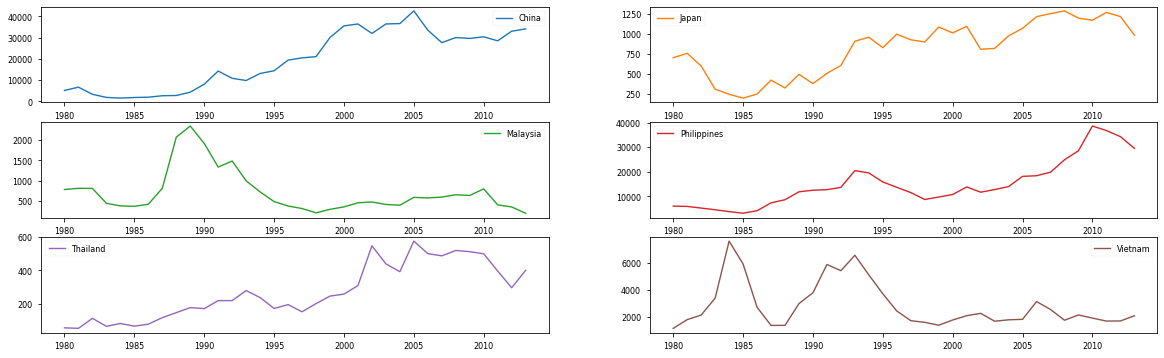

In [48]:
_ = df.loc[country_list,years].T.plot(figsize=(20,6),subplots=True,layout=(3,2),sharex=False) #sharex?

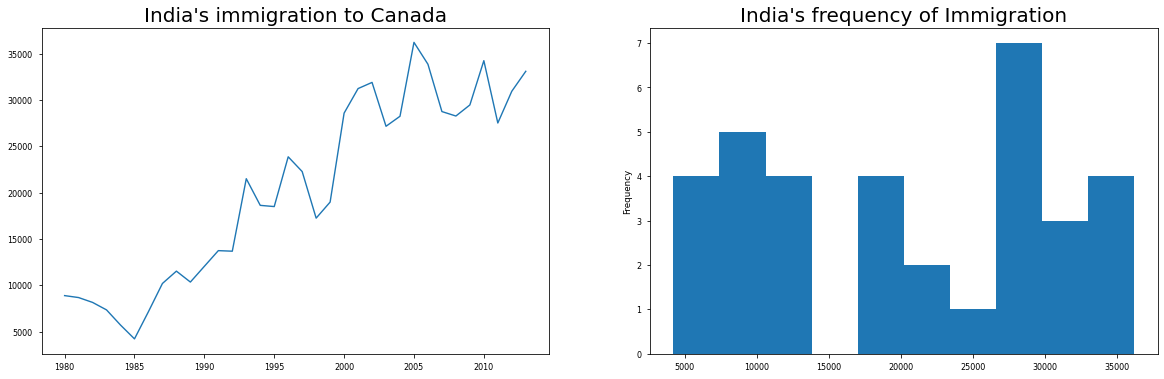

In [62]:
fig, ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
df.loc['India',years].plot(ax=ax[0])
df.loc['India',years].plot(ax=ax[1],kind='hist')
ax[0].set_title("India's immigration to Canada", fontsize = 20)
ax[1].set_title("India's frequency of Immigration", fontsize = 20)
plt.show()

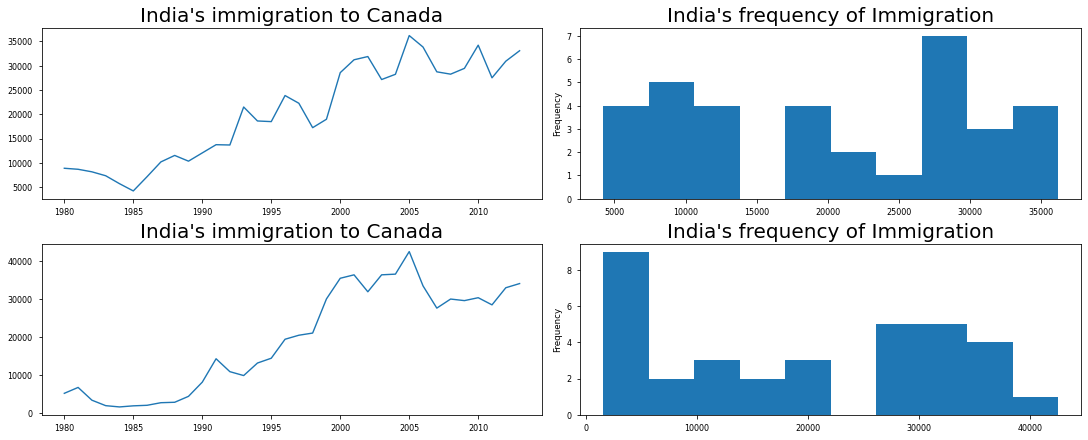

In [101]:
fig, ax = plt.subplots(figsize=(15,6), nrows=2, ncols=2, constrained_layout=True)
df.loc['India',years].plot(ax=ax[0,0])
df.loc['India',years].plot(ax=ax[0,1],kind='hist')
df.loc['China',years].plot(ax=ax[1,0])
df.loc['China',years].plot(ax=ax[1,1],kind='hist')
ax[0,0].set_title("India's immigration to Canada", fontsize = 20)
ax[0,1].set_title("India's frequency of Immigration", fontsize = 20)
ax[1,0].set_title("India's immigration to Canada", fontsize = 20)
ax[1,1].set_title("India's frequency of Immigration", fontsize = 20)
plt.show()


<AxesSubplot: >

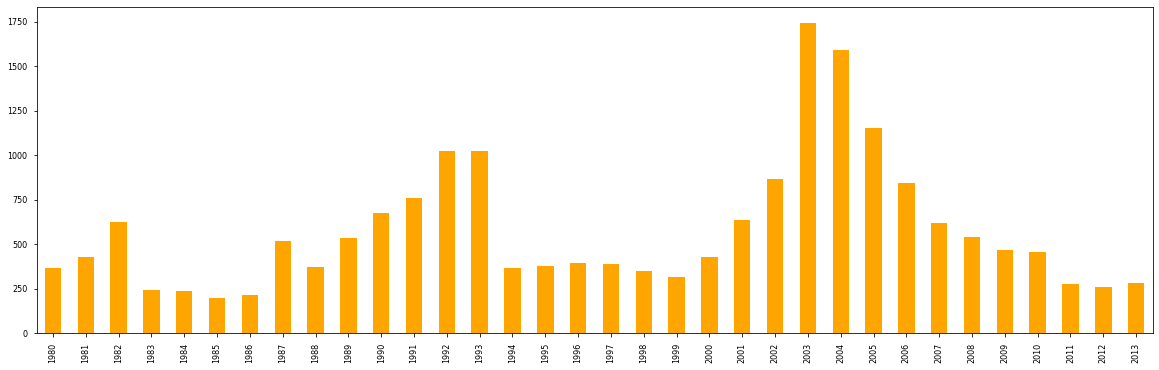

In [64]:
df.loc['Argentina',years].plot(kind='bar', figsize=(20,6),color='orange')

<AxesSubplot: >

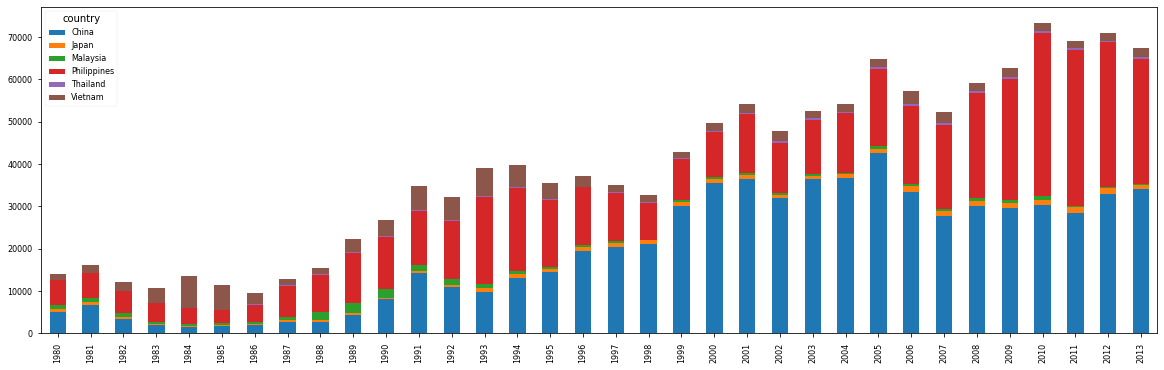

In [78]:
df.loc[country_list,years].T.plot(kind='bar', figsize=(20,6),stacked=True)

<AxesSubplot: ylabel='total'>

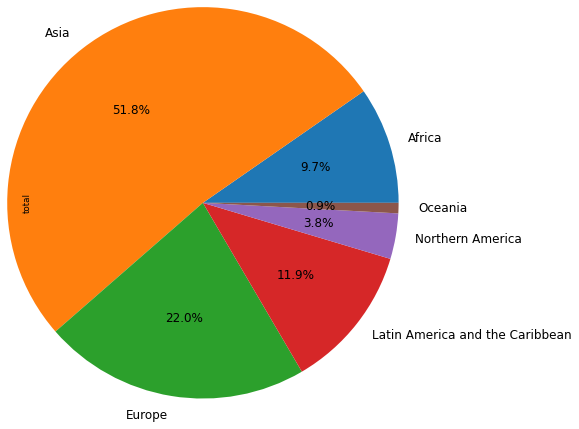

In [66]:
plt.figure(facecolor='white')
continent_df['total'] = continent_df.sum(axis=1)
continent_df['total'].plot(kind='pie',figsize =(20,6),autopct='%1.1f%%',radius=1.5, fontsize=12)

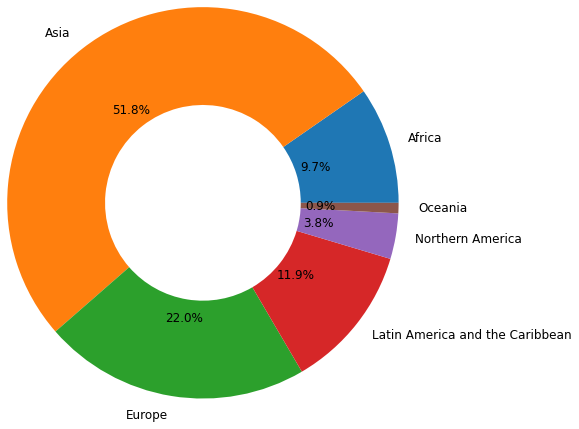

In [69]:
plt.figure(facecolor='white')
continent_df['total'] = continent_df.sum(axis=1)
continent_df['total'].plot(kind='pie',figsize =(20,6),autopct='%1.1f%%',radius=1.5, fontsize=12, wedgeprops={'width': 0.75})
plt.ylabel('')
plt.savefig('continent_wise_immigration_pie_chart.png', dpi = 300, bbox_inches='tight')

<AxesSubplot: >

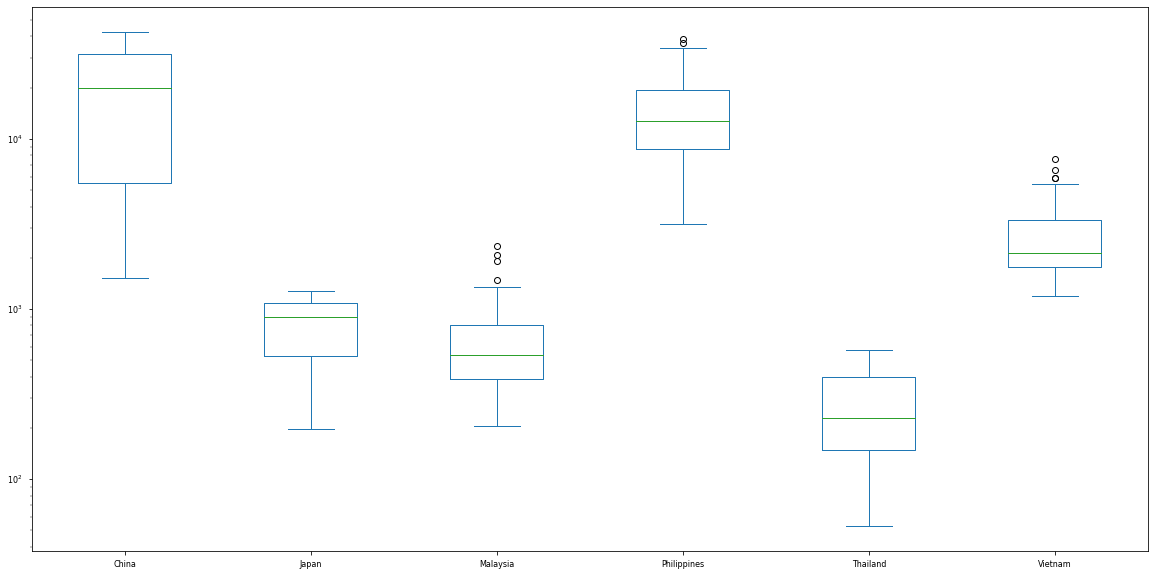

In [71]:
df.loc[country_list,years].T.plot(kind='box',figsize=(20,10), logy=True)

plotly

In [73]:
years = list(range(1980, 2014))
india_data = df.loc['India',years]
px.line(india_data, x= india_data.index, y= india_data.values, markers = True,height=300)

In [74]:
px.bar(india_data, x= india_data.index, y= india_data.values)

In [75]:
countrydf = df.loc[country_list,years].T
px.bar(countrydf, x= countrydf.index, y= countrydf.columns, barmode='group',log_y=True)

In [76]:
px.area(countrydf, x= countrydf.index, y= countrydf.columns)

In [77]:
px.funnel(countrydf, x= countrydf.index, y= countrydf.columns)

In [84]:
px.choropleth(df, locations=df.index, locationmode='country names', color='total',height=600)

In [85]:
import folium

In [89]:
folium.Map(location=[26.850000, 80.949997],zoom_start=14,height=400)

In [91]:
folium.Map(location=[26.850000, 80.949997],zoom_start=14,height=400,tiles='stamen Toner')

In [95]:
lko=folium.Map(location=[26.850000, 80.949997],zoom_start=14,height=400)
m1=folium.Marker([26.850000, 80.949997],popup='Lucknow Center', tooltip='Click to see')
m1.add_to(lko)
lko

In [97]:
lko.add_child(folium.ClickForMarker())
lko

In [98]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [99]:
state_data

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [100]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

c:\Users\Lenovo\Downloads\New folder\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: >

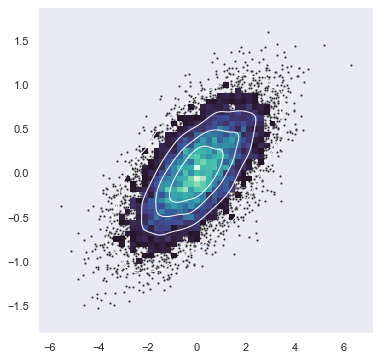

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# mapbox

# visualization on map